In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import ast
import cv2
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16,ResNet50


**1.Carga csv**

Se sacan las coordenadas de las regiones de interés de las imágenes del video 7


In [2]:
file_path = 'C:/Users/andre/Downloads/csv_final_video7.csv'
df = pd.read_csv(file_path)

df.head()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,surco-rouviere-244.jpg,102026,{},3,0,"{""name"":""rect"",""x"":298,""y"":192,""width"":336,""he...","{""Region"":""vesicula""}"
1,surco-rouviere-244.jpg,102026,{},3,1,"{""name"":""rect"",""x"":259,""y"":367,""width"":135,""he...","{""Region"":""surco""}"
2,surco-rouviere-244.jpg,102026,{},3,2,"{""name"":""rect"",""x"":519,""y"":55,""width"":179,""hei...","{""Region"":""segmento4""}"
3,surco-rouviere-326.jpg,108379,{},3,0,"{""name"":""rect"",""x"":298,""y"":64,""width"":233,""hei...","{""Region"":""vesicula""}"
4,surco-rouviere-326.jpg,108379,{},3,1,"{""name"":""rect"",""x"":142,""y"":250,""width"":170,""he...","{""Region"":""surco""}"


In [3]:
# Asegurarnos de que la columna 'label' exista
df['label'] = df['region_attributes'].apply(lambda x: ast.literal_eval(x).get('Region', ''))

df[['filename', 'label']].head()

,filename,label
0,surco-rouviere-244.jpg,vesicula
1,surco-rouviere-244.jpg,surco
2,surco-rouviere-244.jpg,segmento4
3,surco-rouviere-326.jpg,vesicula
4,surco-rouviere-326.jpg,surco


In [4]:
# Función para convertir las coordenadas del formato JSON a (x_min, y_min, x_max, y_max)
def convert_to_bounding_box(region_shape_attributes):
    shape_dict = ast.literal_eval(region_shape_attributes)
    x_min = shape_dict['x']
    y_min = shape_dict['y']
    x_max = x_min + shape_dict['width']
    y_max = y_min + shape_dict['height']
    return x_min, y_min, x_max, y_max

In [5]:


# Aplicar la función a cada fila del DataFrame y extraer las coordenadas
df['x_min'], df['y_min'], df['x_max'], df['y_max'] = zip(*df['region_shape_attributes'].map(convert_to_bounding_box))

# Asegurarnos de que la columna 'label' existe (si no se ha creado anteriormente)
df['label'] = df['region_attributes'].apply(lambda x: ast.literal_eval(x).get('Region', ''))

# Ahora que las columnas 'x_min', 'y_min', 'x_max', 'y_max', y 'label' están en el DataFrame,
df[['filename', 'x_min', 'y_min', 'x_max', 'y_max', 'label']].head()

,filename,x_min,y_min,x_max,y_max,label
0,surco-rouviere-244.jpg,298,192,634,426,vesicula
1,surco-rouviere-244.jpg,259,367,394,475,surco
2,surco-rouviere-244.jpg,519,55,698,210,segmento4
3,surco-rouviere-326.jpg,298,64,531,470,vesicula
4,surco-rouviere-326.jpg,142,250,312,420,surco


In [6]:
array_filename= df['filename'].unique()

In [7]:
array_filename.shape

(61,)

In [8]:
df.shape

(182, 12)

**Carga csv 2**

Se sacan las coordenadas de las regiones de interés de las imágenes del video 2

In [9]:
file_path2 = 'C:/Users/andre/Downloads/csv_final_video2.csv'
df2 = pd.read_csv(file_path2)

df2.head()


,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,frame_15090.jpg,115668,{},3,0,"{""name"":""rect"",""x"":476,""y"":138,""width"":153,""he...","{""Region"":""vesicula""}"
1,frame_15090.jpg,115668,{},3,1,"{""name"":""rect"",""x"":338,""y"":277,""width"":132,""he...","{""Region"":""surco""}"
2,frame_15090.jpg,115668,{},3,2,"{""name"":""rect"",""x"":638,""y"":234,""width"":120,""he...","{""Region"":""segmento4""}"
3,frame_15103.jpg,128711,{},3,0,"{""name"":""rect"",""x"":454,""y"":145,""width"":143,""he...","{""Region"":""vesicula""}"
4,frame_15103.jpg,128711,{},3,1,"{""name"":""rect"",""x"":370,""y"":305,""width"":166,""he...","{""Region"":""surco""}"


In [10]:
# Asegurarnos de que la columna 'label' exista
df2['label'] = df2['region_attributes'].apply(lambda x: ast.literal_eval(x).get('Region', ''))

df2[['filename', 'label']].head()


,filename,label
0,frame_15090.jpg,vesicula
1,frame_15090.jpg,surco
2,frame_15090.jpg,segmento4
3,frame_15103.jpg,vesicula
4,frame_15103.jpg,surco


In [11]:
# Aplicar la función a cada fila del DataFrame y extraer las coordenadas
df2['x_min'], df2['y_min'], df2['x_max'], df2['y_max'] = zip(*df2['region_shape_attributes'].map(convert_to_bounding_box))

# Asegurarnos de que la columna 'label' existe (si no se ha creado anteriormente)
df2['label'] = df2['region_attributes'].apply(lambda x: ast.literal_eval(x).get('Region', ''))

# Ahora que las columnas 'x_min', 'y_min', 'x_max', 'y_max', y 'label' están en el DataFrame,
df2[['filename', 'x_min', 'y_min', 'x_max', 'y_max', 'label']].head()


,filename,x_min,y_min,x_max,y_max,label
0,frame_15090.jpg,476,138,629,475,vesicula
1,frame_15090.jpg,338,277,470,446,surco
2,frame_15090.jpg,638,234,758,382,segmento4
3,frame_15103.jpg,454,145,597,468,vesicula
4,frame_15103.jpg,370,305,536,439,surco


In [12]:
array_filename2= df2['filename'].unique()
array_filename2.shape

(135,)

In [13]:
df2.shape

(405, 12)

In [14]:
merged_df = pd.concat([df, df2], ignore_index=True)
merged_df.head()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes,label,x_min,y_min,x_max,y_max
0,surco-rouviere-244.jpg,102026,{},3,0,"{""name"":""rect"",""x"":298,""y"":192,""width"":336,""he...","{""Region"":""vesicula""}",vesicula,298,192,634,426
1,surco-rouviere-244.jpg,102026,{},3,1,"{""name"":""rect"",""x"":259,""y"":367,""width"":135,""he...","{""Region"":""surco""}",surco,259,367,394,475
2,surco-rouviere-244.jpg,102026,{},3,2,"{""name"":""rect"",""x"":519,""y"":55,""width"":179,""hei...","{""Region"":""segmento4""}",segmento4,519,55,698,210
3,surco-rouviere-326.jpg,108379,{},3,0,"{""name"":""rect"",""x"":298,""y"":64,""width"":233,""hei...","{""Region"":""vesicula""}",vesicula,298,64,531,470
4,surco-rouviere-326.jpg,108379,{},3,1,"{""name"":""rect"",""x"":142,""y"":250,""width"":170,""he...","{""Region"":""surco""}",surco,142,250,312,420


In [15]:
merged_df.tail()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes,label,x_min,y_min,x_max,y_max
582,frame_24361.jpg,106592,{},3,1,"{""name"":""rect"",""x"":407,""y"":404,""width"":139,""he...","{""Region"":""surco""}",surco,407,404,546,473
583,frame_24361.jpg,106592,{},3,2,"{""name"":""rect"",""x"":461,""y"":236,""width"":281,""he...","{""Region"":""segmento4""}",segmento4,461,236,742,359
584,frame_24462.jpg,121924,{},3,0,"{""name"":""rect"",""x"":119,""y"":126,""width"":346,""he...","{""Region"":""vesicula""}",vesicula,119,126,465,388
585,frame_24462.jpg,121924,{},3,1,"{""name"":""rect"",""x"":375,""y"":402,""width"":134,""he...","{""Region"":""surco""}",surco,375,402,509,463
586,frame_24462.jpg,121924,{},3,2,"{""name"":""rect"",""x"":471,""y"":228,""width"":251,""he...","{""Region"":""segmento4""}",segmento4,471,228,722,356


In [16]:
merged_df.shape

(587, 12)

**Cargar txt para YOLO**

In [17]:
# Definir el mapeo de las etiquetas
label_map = {'vesicula': 0, 'surco': 1, 'segmento4': 2}

def convert_bbox_to_yolo_format(image_w, image_h, x_min, y_min, x_max, y_max):
    """
    Convierte las coordenadas del bounding box al formato YOLO (x_centro, y_centro, width, height) normalizado.
    """
    x_center = (x_min + x_max) / 2.0
    y_center = (y_min + y_max) / 2.0
    width = x_max - x_min
    height = y_max - y_min

    # Normalizar
    x_center /= image_w
    y_center /= image_h
    width /= image_w
    height /= image_h

    return x_center, y_center, width, height

In [18]:
def create_yolo_annotations(df, base_dir, output_dir):
    """
    Crea archivos de anotación en formato YOLO a partir de los datos en el DataFrame.
    
    df : pandas.DataFrame
        DataFrame que contiene las coordenadas y etiquetas de cada imagen.
    base_dir : str
        Ruta al directorio principal que contiene las imágenes organizadas en subcarpetas.
    output_dir : str
        Ruta al directorio donde se guardarán los archivos de anotación.
    """
    # Asegurarse de que el directorio de salida exista
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Definir las carpetas y sus etiquetas correspondientes
    class_folders = {
        'antes-cirugia': 0,
        'durante-cirugia-cordinates': 1,
        'despues-cirugia': 2
    }

    # Procesar cada carpeta en el directorio principal
    for folder, label in class_folders.items():
        folder_path = os.path.join(base_dir, folder)
        
        if not os.path.isdir(folder_path):
            print(f"Advertencia: {folder_path} no es un directorio válido.")
            continue
        
        # Procesar cada imagen en la carpeta
        for name_image in os.listdir(folder_path):
            # Obtener la ruta de la imagen
            image_path = os.path.join(folder_path, name_image)
            
            # Leer la imagen 
            image = cv2.imread(image_path)
        
            if image is None:
                print(f"Error: No se pudo cargar {image_path}")
                continue
        
            h, w = image.shape[:2]  # Obtener alto y ancho de la imagen

            # Crear el archivo .txt para cada imagen
            output_path = os.path.join(output_dir, name_image.replace('.jpg', '.txt'))
            with open(output_path, 'w') as f:
                # Filtrar las filas correspondientes a esta imagen
                df_image = df[df['filename'] == name_image]

                if df_image.empty:
                    # Si no hay regiones para la imagen, escribir un 0 indicando que no hay regiones
                    f.write("")
                else:
                    for _, row in df_image.iterrows():
                        label = label_map[row['label']]  # Convertir la etiqueta al índice
                        x_min, y_min, x_max, y_max = row['x_min'], row['y_min'], row['x_max'], row['y_max']
                        
                        # Convertir el bounding box al formato YOLO
                        x_center, y_center, width, height = convert_bbox_to_yolo_format(w, h, x_min, y_min, x_max, y_max)

                        # Escribir en el archivo de salida
                        f.write(f"{label} {x_center} {y_center} {width} {height}\n")


In [19]:
# Ruta al directorio de imágenes y al directorio de salida de las anotaciones
base_dir = './'
output_dir = './images_txt/'

# Llamar la función para generar las anotaciones
create_yolo_annotations(merged_df, base_dir, output_dir)

**2.Carga de las imágenes**

In [20]:
images = []

In [21]:
# Directorio donde están almacenadas las imágenes
image_dir = 'C:/Users/andre/Documents/Video07/framesVideo/surco-rouviere'
image_dir2 = 'C:/Users/andre/Documents/Video02/framesVideo/extraccion'

In [22]:


# Directorio donde deseas guardar las imágenes seleccionadas
destination_directory = './durante-cirugia/'  

# Asegúrate de que el directorio de destino existe
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# Extraer y copiar los archivos seleccionados
for filename in array_filename:
    source_path = os.path.join(image_dir, filename)
    destination_path = os.path.join(destination_directory, filename)
    
    # Verifica si el archivo existe en el directorio original
    if os.path.exists(source_path):
        shutil.copy(source_path, destination_path)
    else:
        print(f"Advertencia: {filename} no se encontró en {image_dir}")

for filename in array_filename2:
    source_path = os.path.join(image_dir2, filename)
    destination_path = os.path.join(destination_directory, filename)
    
    # Verifica si el archivo existe en el directorio original
    if os.path.exists(source_path):
        shutil.copy(source_path, destination_path)
    else:
        print(f"Advertencia: {filename} no se encontró en {image_dir2}")

print("Proceso completado.")



Proceso completado.


**Procesamiento de la imágenes**

Se redimensionan a un tamaño de 224x224,se normalizan y adicionamente se obtienen las coordenadas de cada región de la imagen

In [23]:
def read_imageResize_with_labels(df, dir='..\database\dataset', target_size=(224, 224)):
    """
    Lee imágenes de un directorio, las redimensiona a 224x224 píxeles y las etiqueta según 
    la carpeta en la que se encuentran. Las imágenes son procesadas en RGB.

    Parámetros:
    -----------
    df : pandas.DataFrame
        DataFrame que contiene la información de las imágenes y coordenadas.
    dir (str): La ruta del directorio que contiene las carpetas 'antes-cirugia', 
               'durante-cirugia', y 'despues-cirugia'. Las carpetas deben estar en la 
               misma ubicación.
    target_size : tuple, opcional
        Tamaño al que se redimensionarán las imágenes. Por defecto es (224, 224).

    Retorno:
    --------
    tuple: 
        - np.array: Un array de NumPy con las imágenes redimensionadas.
        - dict: Un diccionario con los bounding boxes y las etiquetas correspondientes a las imágenes.
    """
    images_now = []
    bbox_targets = []
    class_targets = []

    # Definir las carpetas y sus etiquetas correspondientes
    class_folders = {
        'antes-cirugia': 0,
        'durante-cirugia-cordinates': 1,
        'despues-cirugia': 2
    }

    # Procesar cada carpeta en el directorio principal
    for folder, folder_label in class_folders.items():
        folder_path = os.path.join(dir, folder)

        if not os.path.isdir(folder_path):
            print(f"Advertencia: {folder_path} no es un directorio válido.")
            continue

        # Procesar cada imagen en la carpeta
        for name_image in os.listdir(folder_path):
            # Obtener la ruta de la imagen
            image_path = os.path.join(folder_path, name_image)

            # Leer y procesar la imagen
            image = cv2.imread(image_path)
            if image is None:
                print(f"Advertencia: No se pudo leer la imagen {image_path}")
                continue

            height, width = image.shape[:2]
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, target_size, interpolation=cv2.INTER_LINEAR)
            image = image / 255.0

            # Buscar en el DataFrame las etiquetas correspondientes a esta imagen
            df_image = df[df['filename'] == name_image]
            
            # Verificar si hay regiones en la imagen
            if df_image.empty:
                # Imagen sin regiones: asignar etiquetas de una nueva clase "sin regiones" (ejemplo: clase 3)
                bboxes = [[0, 0, 0, 0] for _ in range(3)]
                labels = [3 for _ in range(3)]  # Clase especial "sin regiones"
            else:
                # Imagen con regiones: procesar normalmente
                bboxes = []
                labels = []
                for _, row in df_image.iterrows():
                    label_map = {'vesicula': 0, 'surco': 1, 'segmento4': 2}
                    label = label_map.get(row['label'], 3)  # Clase especial "sin regiones" si no es válida
                    x_scale = target_size[0] / width
                    y_scale = target_size[1] / height

                    x_min = row['x_min'] * x_scale
                    y_min = row['y_min'] * y_scale
                    x_max = row['x_max'] * x_scale
                    y_max = row['y_max'] * y_scale

                    bbox = [x_min, y_min, x_max, y_max]
                    bboxes.append(bbox)
                    labels.append(label)

                # Asegurarse de que cada imagen tenga 3 regiones, si no, rellenar con valores vacíos
                while len(bboxes) < 3:
                    bboxes.append([0, 0, 0, 0])  # Cuadro delimitador vacío
                    labels.append(3)  # Asignar clase especial "sin regiones"

            images_now.append(image)
            bbox_targets.append(bboxes)
            class_targets.append(tf.keras.utils.to_categorical(labels, num_classes=4))  # 4 clases ahora (0, 1, 2, 3)

    images_now = np.array(images_now)
    bbox_targets = np.array(bbox_targets)
    class_targets = np.array(class_targets)

    return images_now, {"bounding_box": bbox_targets, "class_label": class_targets}


In [24]:
# Llamar a la función con la ruta adecuada
images, targets = read_imageResize_with_labels(merged_df,dir='./')



In [25]:
# Verificar el tamaño de los arrays resultantes
print(f"Número de imágenes: {images.shape[0]}")
print(f"Tamaño de cada imagen: {images.shape[1:]}")

# Verificar las etiquetas
print(f"Etiquetas y bounding box: {targets}")

Número de imágenes: 2200
Tamaño de cada imagen: (224, 224, 3)
Etiquetas y bounding box: {'bounding_box': array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]]), 'class_label': array([[[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       ...,

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
 

In [26]:
print(type(images[0]))

<class 'numpy.ndarray'>


In [27]:
def inspect_random_targets(targets, num_items=5):
    """
    Inspecciona 'num_items' elementos aleatorios de targets para visualizar 
    los bounding boxes y las etiquetas de clase.
    
    Parámetros:
    ----------
    targets : dict
        Diccionario que contiene 'bounding_box' y 'class_label'.
    num_items : int, opcional
        Número de elementos a visualizar.
    """
    bounding_boxes = targets['bounding_box']
    class_labels = targets['class_label']
    
    # Obtener índices aleatorios
    random_indices = np.random.choice(len(bounding_boxes), num_items, replace=False)
    
    # Mostrar los elementos aleatorios seleccionados
    for i in random_indices:
        print(f"--- Imagen {i+1} ---")
        
        # Bounding Boxes
        print(f"Bounding Boxes (imagen {i+1}):")
        for bbox in bounding_boxes[i]:
            print(f"x_min: {bbox[0]}, y_min: {bbox[1]}, x_max: {bbox[2]}, y_max: {bbox[3]}")
        
        # Class Labels
        print(f"Class Labels (imagen {i+1}):")
        for label in class_labels[i]:
            label_index = np.argmax(label)
            # Ajustar el nombre para la clase especial 3
            if label_index == 3:
                label_name = 'sin regiones'
            else:
                label_name = 'vesicula' if label_index == 0 else ('surco' if label_index == 1 else 'segmento4')
                
            print(f"Label: {label_index} ({label_name})")
        
        print("\n")


In [28]:
# Llama a la función para inspeccionar 5 elementos aleatorios de targets
inspect_random_targets(targets, num_items=5)

--- Imagen 599 ---
Bounding Boxes (imagen 599):
x_min: 0.0, y_min: 0.0, x_max: 0.0, y_max: 0.0
x_min: 0.0, y_min: 0.0, x_max: 0.0, y_max: 0.0
x_min: 0.0, y_min: 0.0, x_max: 0.0, y_max: 0.0
Class Labels (imagen 599):
Label: 3 (sin regiones)
Label: 3 (sin regiones)
Label: 3 (sin regiones)


--- Imagen 513 ---
Bounding Boxes (imagen 513):
x_min: 0.0, y_min: 0.0, x_max: 0.0, y_max: 0.0
x_min: 0.0, y_min: 0.0, x_max: 0.0, y_max: 0.0
x_min: 0.0, y_min: 0.0, x_max: 0.0, y_max: 0.0
Class Labels (imagen 513):
Label: 3 (sin regiones)
Label: 3 (sin regiones)
Label: 3 (sin regiones)


--- Imagen 487 ---
Bounding Boxes (imagen 487):
x_min: 0.0, y_min: 0.0, x_max: 0.0, y_max: 0.0
x_min: 0.0, y_min: 0.0, x_max: 0.0, y_max: 0.0
x_min: 0.0, y_min: 0.0, x_max: 0.0, y_max: 0.0
Class Labels (imagen 487):
Label: 3 (sin regiones)
Label: 3 (sin regiones)
Label: 3 (sin regiones)


--- Imagen 1575 ---
Bounding Boxes (imagen 1575):
x_min: 0.0, y_min: 0.0, x_max: 0.0, y_max: 0.0
x_min: 0.0, y_min: 0.0, x_max: 0.

In [29]:
import os

# Lista de imágenes en el directorio
images_in_directory = set(os.listdir(destination_directory))

# Lista de imágenes en el DataFrame
images_in_dataframe = set(merged_df['filename'].unique())

# Imágenes que están en el directorio pero no en el DataFrame
missing_in_dataframe = images_in_directory - images_in_dataframe

# Imágenes que están en el DataFrame pero no en el directorio
missing_in_directory = images_in_dataframe - images_in_directory

# Mostrar los resultados
print(f"Imágenes en el directorio pero no en el DataFrame: {len(missing_in_dataframe)}")
print(missing_in_dataframe)

print(f"Imágenes en el DataFrame pero no en el directorio: {len(missing_in_directory)}")
print(missing_in_directory)


Imágenes en el directorio pero no en el DataFrame: 784
{'frame_4755.jpg', 'frame_7297.jpg', 'frame_5079.jpg', 'frame_3042 - Copy - Copy.jpg', 'frame_3189 - Copy.jpg', 'frame_6338.jpg', 'frame_6159.jpg', 'frame_3259 - Copy.jpg', 'frame_3486 - Copy.jpg', 'frame_4402.jpg', 'frame_3249 - Copy.jpg', 'frame_3500 - Copy.jpg', 'frame_5150.jpg', 'frame_6409.jpg', 'frame_4381.jpg', 'frame_5689.jpg', 'frame_5754.jpg', 'frame_5179.jpg', 'frame_3300 - Copy.jpg', 'frame_4458.jpg', 'frame_4653.jpg', 'frame_5770.jpg', 'frame_4646.jpg', 'frame_3803 - Copy.jpg', 'frame_4698.jpg', 'frame_7354.jpg', 'frame_3131 - Copy.jpg', 'frame_6284.jpg', 'frame_4499.jpg', 'frame_3233 - Copy.jpg', 'frame_5017.jpg', 'frame_3009 - Copy - Copy.jpg', 'frame_7244.jpg', 'frame_3711.jpg', 'frame_2850 - Copy - Copy.jpg', 'frame_2885 - Copy - Copy.jpg', 'frame_2972 - Copy - Copy.jpg', 'frame_3140 - Copy.jpg', 'frame_4040 - Copy.jpg', 'frame_3419 - Copy.jpg', 'frame_4615.jpg', 'frame_5024.jpg', 'frame_2917 - Copy - Copy.jpg', 'f

In [30]:
print(images.shape)

(2200, 224, 224, 3)


In [31]:
def visualize_bounding_boxes(images, targets, num_images=5, columns=2):
    """
    Visualiza un número determinado de imágenes con sus correspondientes cuadros delimitadores
    y etiquetas de clase. No dibuja cuadros ni etiquetas si la clase es inválida (-1 o 3).

    Parámetros:
    -----------
    images : numpy.ndarray
        Array de imágenes.
    targets : dict
        Diccionario que contiene los cuadros delimitadores ('bounding_box') y etiquetas ('class_label').
    num_images : int, opcional
        Número de imágenes a visualizar.
    columns : int, opcional
        Número de columnas en la visualización de subplots.
    """

    # Generar índices aleatorios para seleccionar imágenes
    random_indices = np.random.choice(len(images), num_images, replace=False)

    # Definir el número de filas en función del número de imágenes y columnas
    rows = (num_images + columns - 1) // columns

    # Crear subplots
    fig, axes = plt.subplots(rows, columns, figsize=(15, 5 * rows))
    axes = axes.flatten()  # Aplanar los ejes para facilitar el acceso

    for idx, i in enumerate(random_indices):
        ax = axes[idx]
        ax.imshow(images[i])
        bbox_list = targets['bounding_box'][i]
        class_list = targets['class_label'][i]

        for bbox, class_label in zip(bbox_list, class_list):
            label = np.argmax(class_label)

            # Si la etiqueta es -1 o 3 (sin regiones), no dibujar cuadros
            if label == -1 or label == 3:
                continue  # Salta la región si es una clase inválida

            # Definir el color y el nombre de la etiqueta
            color = 'red' if label == 0 else ('blue' if label == 1 else 'green')
            label_name = 'vesicula' if label == 0 else ('surco' if label == 1 else 'segmento4')

            # Dibujar el cuadro delimitador
            ax.add_patch(plt.Rectangle(
                (bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1],
                edgecolor=color, facecolor='none', linewidth=2))

            # Añadir el texto de la etiqueta
            ax.text(bbox[0], bbox[1] - 10, f"{label_name}", color=color, fontsize=12,
                    bbox=dict(facecolor='yellow', alpha=0.5))
        
        ax.axis('off')  # Ocultar los ejes

    # Eliminar los subplots vacíos si el número de imágenes es menor que los subplots creados
    for idx in range(num_images, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()



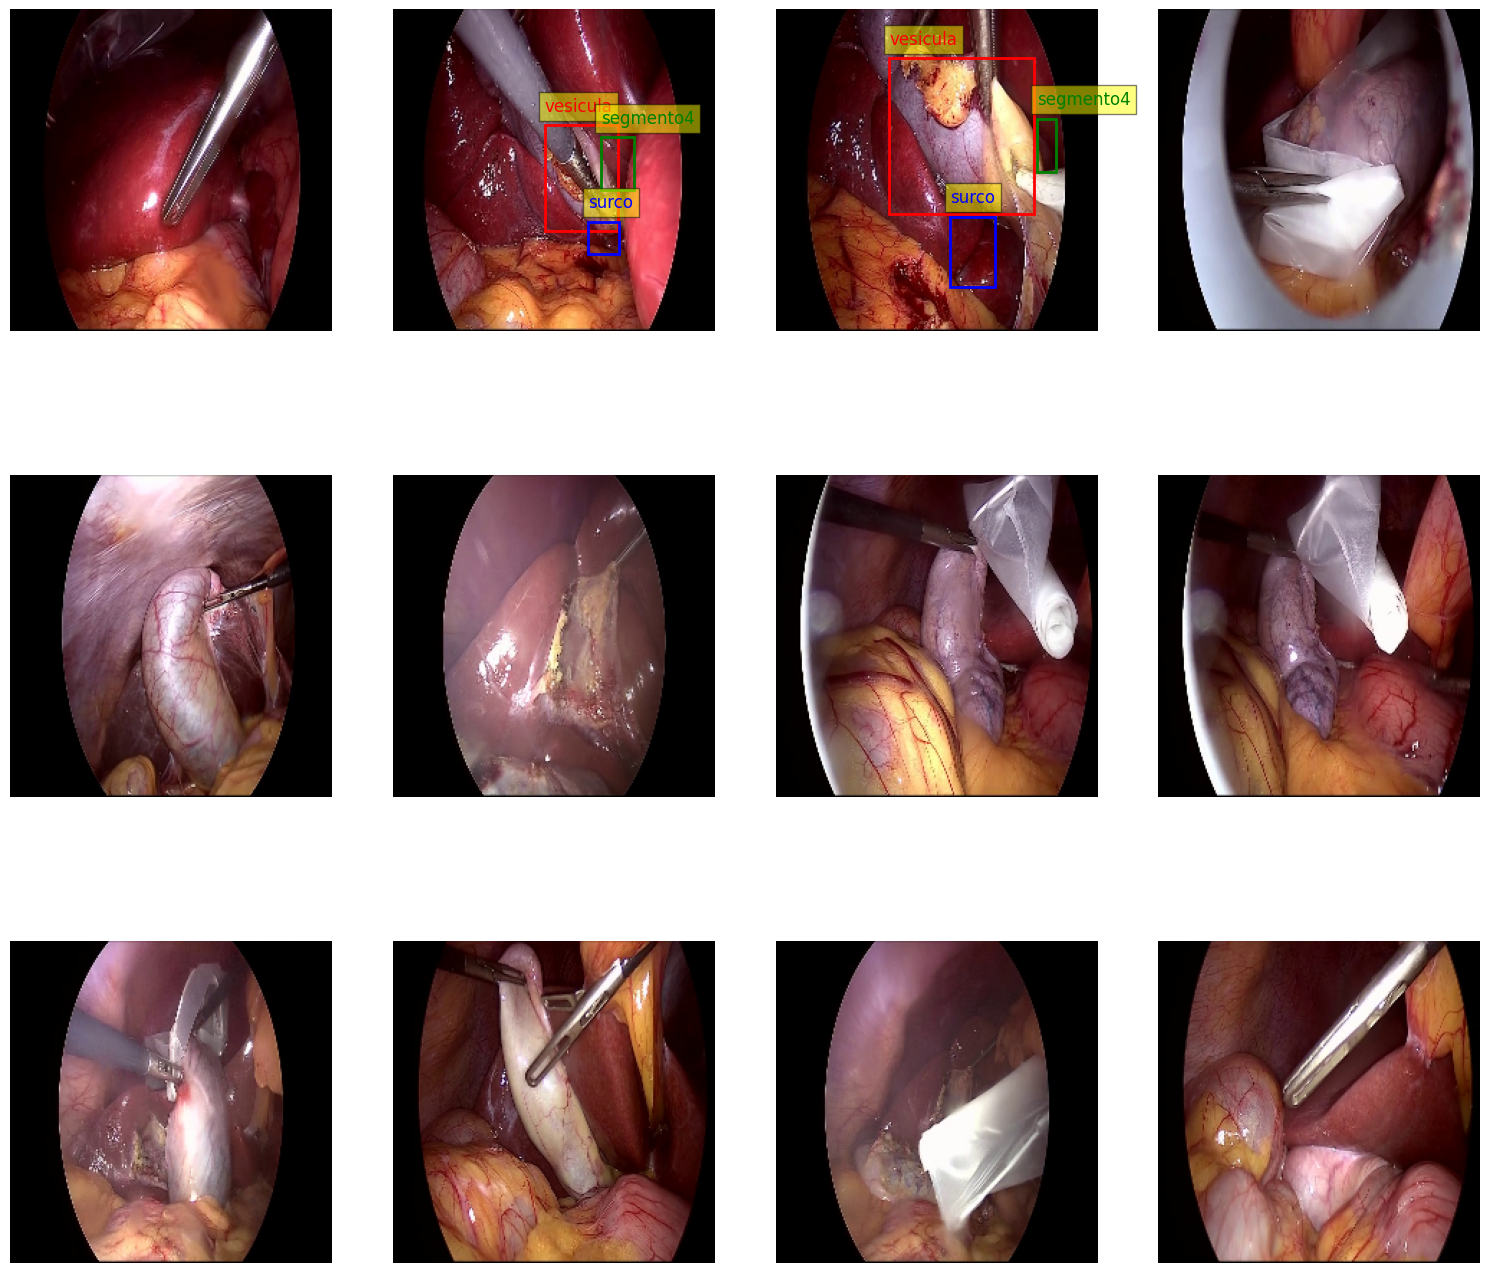

In [32]:
# Ejemplo de uso
visualize_bounding_boxes(images, targets, num_images=12, columns=4)

**División train-test**

In [33]:

def ensure_directory_exists(directory):
    """
    Crea el directorio si no existe.
    
    Parámetros:
    -----------
    directory : str
        La ruta del directorio.
    """
    if not os.path.exists(directory):
        os.makedirs(directory)

In [34]:
def get_image_filenames(image_dirs):
    """
    Obtiene los nombres de los archivos de imagen .jpg de múltiples directorios.
    
    Parámetros:
    -----------
    image_dirs : list
        Lista de rutas de los directorios que contienen las imágenes.
        
    Retorno:
    --------
    list : Lista de nombres de archivos .jpg.
    """
    image_filenames = []
    for image_dir in image_dirs:
        image_filenames += [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
    return image_filenames

In [35]:
def copy_images_and_txt(image_list, output_dir, image_dirs, txt_dir):
    """
    Copia las imágenes y sus correspondientes archivos .txt a un directorio de destino.
    
    Parámetros:
    -----------
    image_list : list
        Lista de nombres de archivos de imagen.
    output_dir : str
        Directorio de salida para las imágenes y archivos .txt.
    image_dirs : list
        Lista de rutas de directorios donde se encuentran las imágenes.
    txt_dir : str
        Directorio que contiene los archivos .txt con las etiquetas.
    """
    for image in image_list:
        # Buscar en qué directorio está la imagen
        for image_dir in image_dirs:
            image_path = os.path.join(image_dir, image)
            if os.path.exists(image_path):
                # Copiar la imagen
                shutil.copy(image_path, os.path.join(output_dir, image))
                
                # Copiar el archivo .txt correspondiente
                txt_filename = image.replace('.jpg', '.txt')
                txt_path = os.path.join(txt_dir, txt_filename)
                
                if os.path.exists(txt_path):
                    shutil.copy(txt_path, os.path.join(output_dir, txt_filename))
                else:
                    print(f"Advertencia: No se encontró el archivo {txt_filename} para la imagen {image}.")
                break

In [36]:
def split_data(image_filenames, val_size=0.2):
    """
    Divide los datos en conjuntos de entrenamiento y validación.
    
    Parámetros:
    -----------
    image_filenames : list
        Lista de nombres de archivos de imagen.
    val_size : float, opcional
        Proporción del conjunto de validación. Por defecto es 0.2.
        
    Retorno:
    --------
    tuple : Listas de imágenes divididas en entrenamiento y validación.
    """
    return train_test_split(image_filenames, test_size=val_size, random_state=42)

In [37]:
def split_data_multiple_dirs(image_dirs, txt_dir, output_train_dir, output_val_dir, val_size=0.2):
    """
    Divide los datos en entrenamiento y validación, copiando las imágenes y sus archivos .txt 
    correspondientes desde varios directorios.
    
    Parámetros:
    -----------
    image_dirs : list
        Lista de rutas de los directorios que contienen las imágenes.
    txt_dir : str
        Directorio que contiene los archivos .txt con las etiquetas.
    output_train_dir : str
        Directorio de salida para las imágenes y etiquetas de entrenamiento.
    output_val_dir : str
        Directorio de salida para las imágenes y etiquetas de validación.
    val_size : float, opcional
        Proporción del conjunto de validación. Por defecto es 0.2.
    """
    # Asegurarse de que los directorios de salida existan
    ensure_directory_exists(output_train_dir)
    ensure_directory_exists(output_val_dir)
    
    # Obtener una lista con los nombres de los archivos .jpg de todos los directorios
    image_filenames = get_image_filenames(image_dirs)
    
    # Dividir los datos en conjuntos de entrenamiento y validación
    train_images, val_images = split_data(image_filenames, val_size)
    
    # Copiar los datos de entrenamiento
    copy_images_and_txt(train_images, output_train_dir, image_dirs, txt_dir)
    
    # Copiar los datos de validación
    copy_images_and_txt(val_images, output_val_dir, image_dirs, txt_dir)
    
    print(f"Datos divididos: {len(train_images)} para entrenamiento y {len(val_images)} para validación.")




In [38]:
# Directorios de imágenes (varios)
image_dirs = ['./antes-cirugia', './durante-cirugia-cordinates', './despues-cirugia']

# Directorio de archivos .txt
txt_dir = './images_txt/'

# Directorios de salida para entrenamiento y validación
output_train_dir = './train/'
output_val_dir = './val/'

# Dividir los datos
split_data_multiple_dirs(image_dirs, txt_dir, output_train_dir, output_val_dir)

Datos divididos: 1760 para entrenamiento y 440 para validación.


In [456]:
from collections import Counter 
# Verificar las proporciones en los conjuntos de entrenamiento, validación y prueba
print("Proporciones en el conjunto de entrenamiento:", Counter(y_train))
print("Proporciones en el conjunto de validación:", Counter(y_val))


Proporciones en el conjunto de entrenamiento: Counter({1.0: 157, 0.0: 157, 2.0: 156})
Proporciones en el conjunto de validación: Counter({2.0: 40, 1.0: 39, 0.0: 39})


In [457]:
print(type(coord_train))

<class 'numpy.ndarray'>


In [458]:
X_train

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [459]:
coord_train

array([[[ 68.72131148,  62.53333333, 115.14754098, 215.13333333],
        [ 44.59016393, 173.13333333,  70.03278689, 210.        ],
        [109.1147541 ,  42.46666667, 182.03278689, 153.06666667]],

       [[ 51.93442623,  11.2       , 112.        , 169.4       ],
        [ 89.44262295, 175.46666667, 118.03278689, 218.4       ],
        [117.24590164,  73.73333333, 153.70491803, 159.6       ]],

       [[ 79.73770492,   7.46666667, 143.21311475, 155.4       ],
        [ 85.50819672, 158.2       , 133.7704918 , 200.66666667],
        [146.62295082,  87.73333333, 166.03278689, 132.06666667]],

       ...,

       [[  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ]],

       [[  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.

In [460]:
y_train

array([1., 1., 1., 2., 0., 0., 2., 1., 2., 0., 2., 1., 0., 1., 1., 2., 1.,
       2., 1., 0., 2., 0., 1., 1., 1., 2., 1., 0., 0., 2., 0., 2., 2., 0.,
       2., 2., 0., 1., 2., 0., 0., 0., 1., 2., 0., 0., 1., 0., 0., 0., 1.,
       2., 2., 2., 0., 0., 2., 0., 1., 2., 0., 0., 1., 0., 2., 2., 1., 1.,
       2., 1., 2., 2., 0., 1., 1., 1., 1., 1., 0., 1., 2., 2., 0., 1., 2.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 2., 1., 0., 0., 1., 2.,
       0., 0., 2., 0., 0., 0., 1., 2., 0., 1., 0., 0., 1., 1., 2., 0., 2.,
       1., 0., 0., 2., 0., 1., 0., 1., 0., 1., 0., 2., 1., 1., 1., 0., 1.,
       2., 2., 2., 0., 1., 0., 2., 0., 1., 2., 2., 2., 0., 1., 1., 1., 2.,
       0., 2., 0., 0., 1., 2., 1., 0., 2., 1., 1., 1., 1., 2., 0., 1., 2.,
       2., 1., 0., 1., 1., 0., 1., 2., 0., 2., 2., 2., 0., 2., 0., 0., 0.,
       0., 2., 0., 0., 1., 0., 1., 1., 1., 2., 2., 2., 2., 1., 2., 2., 0.,
       2., 2., 0., 2., 0., 2., 1., 2., 0., 2., 2., 0., 0., 2., 0., 1., 0.,
       1., 1., 0., 2., 2.

**Entrenamiento de modelo de transfer learning**

In [461]:
def create_model(base_model_name='VGG16', input_shape=(224, 224, 3), coord_shape=(3, 4), freeze_base_model=True):
    """
    Crea un modelo basado en VGG16 o ResNet50 con la estructura especificada para predecir clases
    utilizando imágenes y coordenadas como entradas.

    Parámetros:
    -----------
    base_model_name : str, opcional
        Nombre del modelo base a utilizar ('VGG16' o 'ResNet50'). Por defecto es 'VGG16'.
    input_shape : tuple, opcional
        Tamaño de la entrada de las imágenes. Por defecto es (224, 224, 3).
    coord_shape : tuple, opcional
        Tamaño de la entrada para las coordenadas. Por defecto es (3, 4).
    freeze_base_model : bool, opcional
        Si True, congela las capas del modelo base. Por defecto es True.

    Retorno:
    --------
    model : keras.Model
        Modelo compilado listo para ser entrenado.
    """
    # Selección del modelo base
    if base_model_name == 'VGG16':
        base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    elif base_model_name == 'ResNet50':
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    else:
        raise ValueError("base_model_name must be either 'VGG16' or 'ResNet50'")

    # Congelar o no las capas del modelo base
    if freeze_base_model:
        base_model.trainable = False

    # Entrada para las imágenes
    image_input = base_model.input

    # Entrada para las coordenadas
    coord_input = Input(shape=coord_shape, name='coord_input')

    # Extraer características de la imagen
    x = base_model.output
    x = Flatten()(x)

    # Aplanar las coordenadas para la concatenación
    coord_flat = Flatten()(coord_input)

    # Concatenar características de imagen y coordenadas
    combined = Concatenate()([x, coord_flat])

    # Añadir capas densas finales
    x = Dense(32, activation='relu')(combined)
    x = Dropout(0.5)(x)
    output = Dense(3, activation='softmax')(x)

    # Crear el modelo con dos entradas
    model = Model(inputs=[image_input, coord_input], outputs=output)

    # Compilar el modelo
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Resumen del modelo
    model.summary()

    return model


**VGG16**

In [462]:
model_vgg16 = create_model(base_model_name='VGG16', input_shape=(224, 224, 3), coord_shape=(3, 4), freeze_base_model=True)


Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 224, 224, 64  1792        ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 224, 224, 64  36928       ['block1_conv1[0][0]']           
                                )                                                          

In [463]:
# Paso 4: Entrenar el modelo
history_vgg16 = model_vgg16.fit(
    [X_train, coord_train], y_train_cat,
    epochs=10,
    validation_data=([X_val, coord_val], y_val_cat))

Epoch 1/10
15/15 [==============================] - 3s 149ms/step - loss: 1.4546 - accuracy: 0.4617 - val_loss: 0.3502 - val_accuracy: 0.8814
Epoch 2/10
15/15 [==============================] - 2s 140ms/step - loss: 0.4686 - accuracy: 0.7681 - val_loss: 0.2035 - val_accuracy: 0.9915
Epoch 3/10
15/15 [==============================] - 2s 146ms/step - loss: 0.3393 - accuracy: 0.8723 - val_loss: 0.1531 - val_accuracy: 0.9831
Epoch 4/10
15/15 [==============================] - 2s 148ms/step - loss: 0.2261 - accuracy: 0.9234 - val_loss: 0.1015 - val_accuracy: 0.9746
Epoch 5/10
15/15 [==============================] - 2s 156ms/step - loss: 0.1962 - accuracy: 0.9277 - val_loss: 0.0661 - val_accuracy: 1.0000
Epoch 6/10
15/15 [==============================] - 2s 148ms/step - loss: 0.1657 - accuracy: 0.9383 - val_loss: 0.0553 - val_accuracy: 1.0000
Epoch 7/10
15/15 [==============================] - 2s 145ms/step - loss: 0.1536 - accuracy: 0.9532 - val_loss: 0.0460 - val_accuracy: 1.0000
Epoch 

**Resnet50**

In [464]:
model_resnet = create_model(base_model_name='ResNet50', input_shape=(224, 224, 3), coord_shape=(3, 4), freeze_base_model=True)

# Paso 4: Entrenar el modelo

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_12[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [465]:


history_resnet = model_resnet.fit(
    [X_train, coord_train], y_train_cat,
    epochs=10,
    validation_data=([X_val, coord_val], y_val_cat))

Epoch 1/10
15/15 [==============================] - 11s 132ms/step - loss: 0.9092 - accuracy: 0.5766 - val_loss: 0.5131 - val_accuracy: 0.6695
Epoch 2/10
15/15 [==============================] - 1s 84ms/step - loss: 0.6118 - accuracy: 0.6596 - val_loss: 0.4583 - val_accuracy: 0.8983
Epoch 3/10
15/15 [==============================] - 1s 83ms/step - loss: 0.5709 - accuracy: 0.6723 - val_loss: 0.4698 - val_accuracy: 0.7797
Epoch 4/10
15/15 [==============================] - 1s 84ms/step - loss: 0.5155 - accuracy: 0.7191 - val_loss: 0.3991 - val_accuracy: 0.9153
Epoch 5/10
15/15 [==============================] - 1s 82ms/step - loss: 0.4915 - accuracy: 0.7468 - val_loss: 0.3844 - val_accuracy: 0.8559
Epoch 6/10
15/15 [==============================] - 1s 82ms/step - loss: 0.4600 - accuracy: 0.7745 - val_loss: 0.3585 - val_accuracy: 0.9237
Epoch 7/10
15/15 [==============================] - 1s 82ms/step - loss: 0.4553 - accuracy: 0.7872 - val_loss: 0.3380 - val_accuracy: 0.9153
Epoch 8/10


**Métricas**

In [466]:
# Visualización de curvas de pérdida y precisión
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curves')
    
    plt.show()

In [467]:
def evaluate_model(model, X_val, coord_val, y_val_cat, class_names=['antes-cirugia', 'durante-cirugia', 'despues-cirugia']):
    """
    Evalúa el modelo en el conjunto de validación y genera un reporte de clasificación
    junto con una matriz de confusión.

    Parámetros:
    -----------
    model : keras.Model
        Modelo entrenado que se va a evaluar.
    X_val : np.ndarray
        Conjunto de datos de validación (imágenes).
    coord_val : np.ndarray
        Conjunto de datos de validación (coordenadas).
    y_val_cat : np.ndarray
        Etiquetas de validación en formato one-hot.
    class_names : list
        Lista con los nombres de las clases (por defecto: ['antes-cirugia', 'durante-cirugia', 'despues-cirugia']).

    Retorno:
    --------
    None
    """
    from sklearn.metrics import classification_report, confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # Generar predicciones para el conjunto de validación
    y_val_pred = model.predict([X_val, coord_val])

    # Convertir predicciones y etiquetas reales a sus índices de clase
    y_val_pred_classes = np.argmax(y_val_pred, axis=1)
    y_val_true_classes = np.argmax(y_val_cat, axis=1)

    # Generar un reporte de clasificación
    report = classification_report(y_val_true_classes, y_val_pred_classes, target_names=class_names)
    print("Classification Report:\n", report)

    # Generar una matriz de confusión
    conf_matrix = confusion_matrix(y_val_true_classes, y_val_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()



**VGG16 resultados**

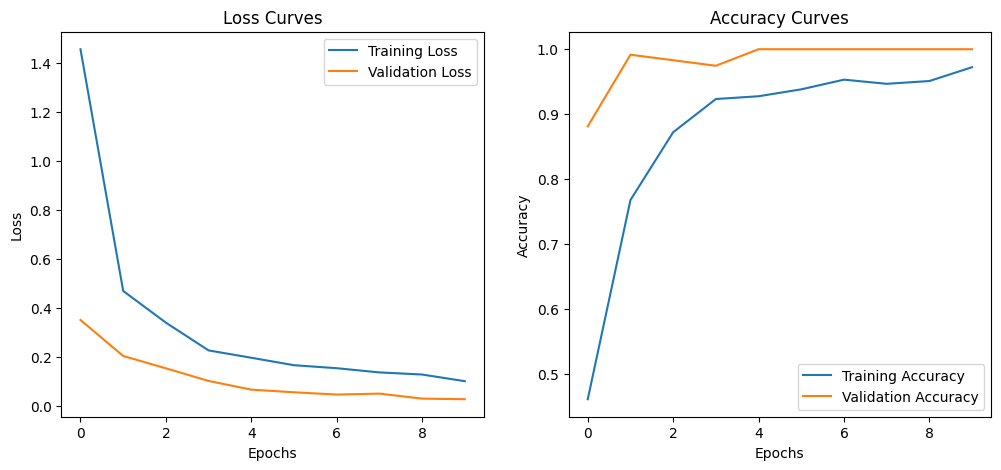

In [468]:
plot_training_history(history_vgg16)

In [469]:
# Evaluar el modelo en los datos de validación
val_loss, val_accuracy = model_vgg16.evaluate([X_val, coord_val], y_val_cat)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


4/4 [==============================] - 0s 92ms/step - loss: 0.0270 - accuracy: 1.0000
Validation Loss: 0.027009854093194008
Validation Accuracy: 1.0


4/4 [==============================] - 0s 95ms/step
Classification Report:
                  precision    recall  f1-score   support

  antes-cirugia       1.00      1.00      1.00        39
durante-cirugia       1.00      1.00      1.00        39
despues-cirugia       1.00      1.00      1.00        40

       accuracy                           1.00       118
      macro avg       1.00      1.00      1.00       118
   weighted avg       1.00      1.00      1.00       118



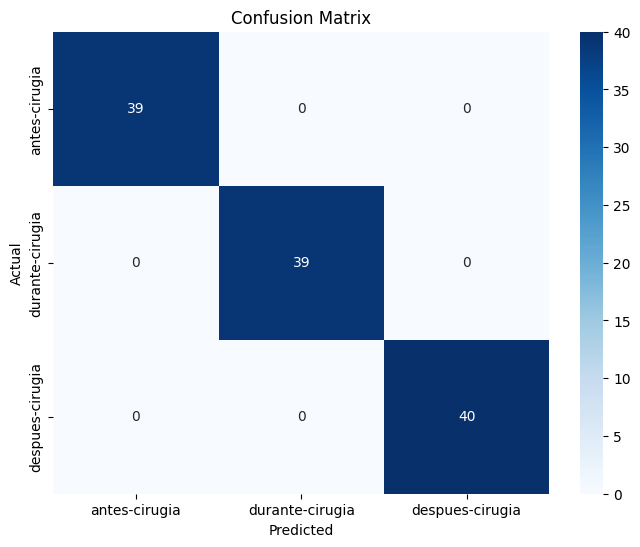

In [470]:
evaluate_model(model_vgg16, X_val, coord_val, y_val_cat)


**Resnet50 Resultados**

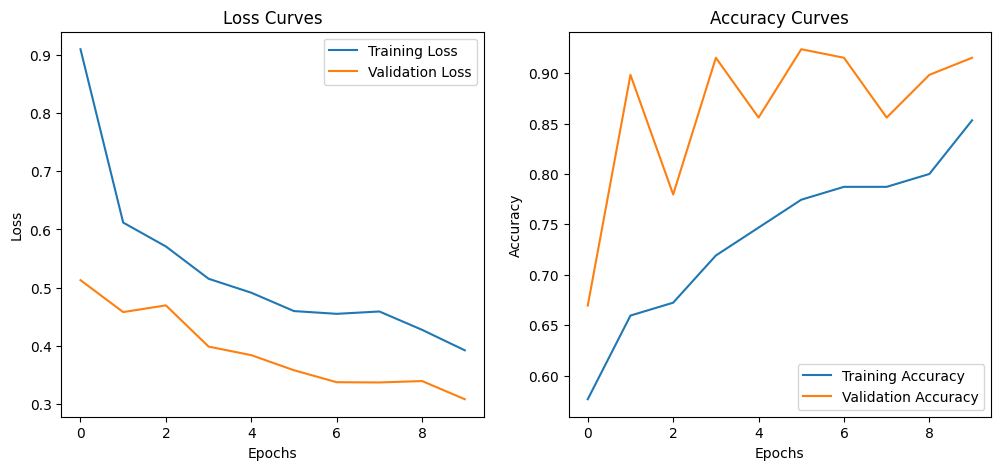

In [471]:
plot_training_history(history_resnet)

In [472]:
# Evaluar el modelo en los datos de validación
val_loss, val_accuracy = model_resnet.evaluate([X_val, coord_val], y_val_cat)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

4/4 [==============================] - 0s 59ms/step - loss: 0.3088 - accuracy: 0.9153
Validation Loss: 0.3088267743587494
Validation Accuracy: 0.9152542352676392


4/4 [==============================] - 1s 61ms/step
Classification Report:
                  precision    recall  f1-score   support

  antes-cirugia       0.82      0.95      0.88        39
durante-cirugia       1.00      1.00      1.00        39
despues-cirugia       0.94      0.80      0.86        40

       accuracy                           0.92       118
      macro avg       0.92      0.92      0.92       118
   weighted avg       0.92      0.92      0.91       118



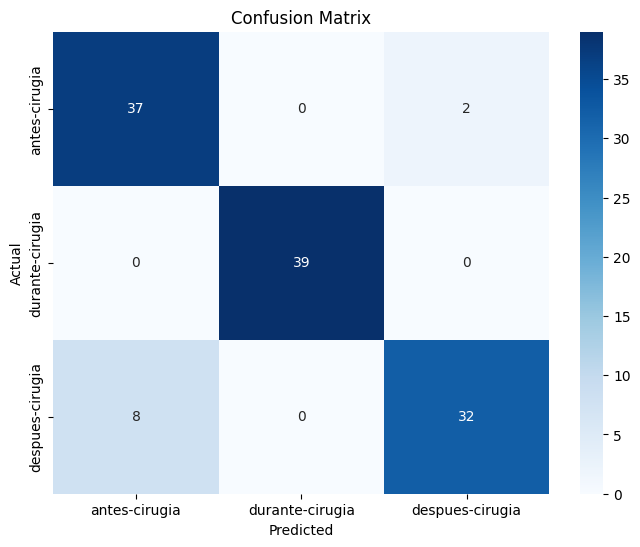

In [473]:
evaluate_model(model_resnet, X_val, coord_val, y_val_cat)

**Comparación modelos**

In [484]:
def plot_comparison(history_vgg16, history_resnet50):
    """
    Genera una gráfica comparativa de la pérdida (loss) y precisión (accuracy) entre dos modelos entrenados.

    Parámetros:
    -----------
    history_vgg16 : keras.callbacks.History
        Historial de entrenamiento del modelo VGG16.
    history_resnet50 : keras.callbacks.History
        Historial de entrenamiento del modelo ResNet50.
    """
    plt.figure(figsize=(14, 6))

    # Comparación de la pérdida
    plt.subplot(1, 2, 1)
    plt.plot(history_vgg16.history['val_accuracy'], label='VGG16 Validation Accuracy')
    plt.plot(history_resnet50.history['val_accuracy'], label='ResNet50 Validation Accuracy')
    plt.title('Comparación de validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Val accuracy')
    plt.legend()

    # Comparación de la precisión
    plt.subplot(1, 2, 2)
    plt.plot(history_vgg16.history['accuracy'], label='VGG16 Training Accuracy')
    plt.plot(history_resnet50.history['accuracy'], label='ResNet50 Training Accuracy')
    plt.title('Comparación de accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


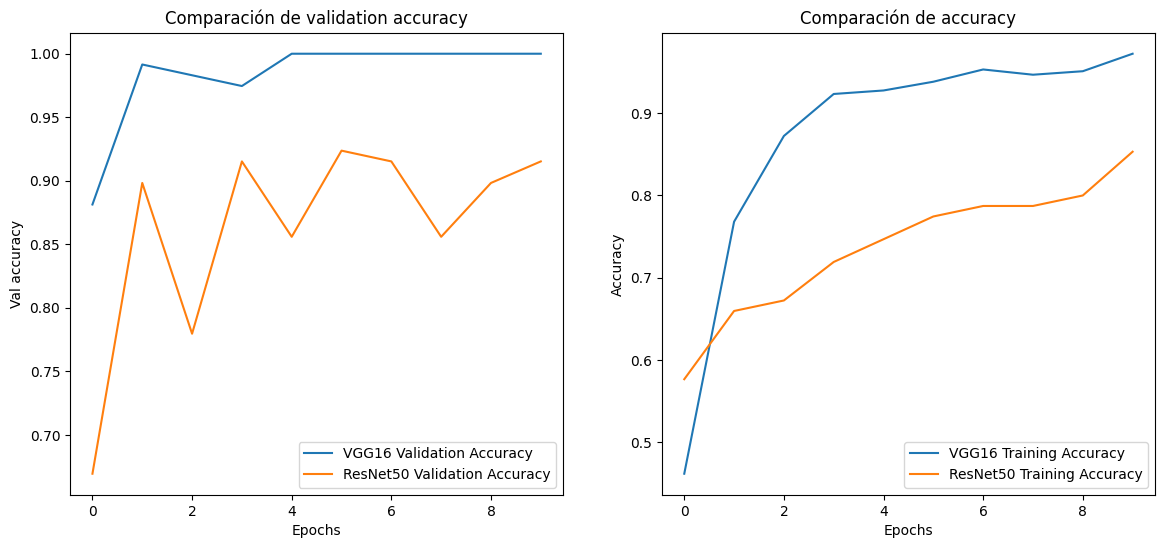

In [485]:
plot_comparison(history_vgg16, history_resnet)


El modelo que se ha diseñado y entrenado está configurado para predecir las clases generales de las imágenes, es decir, está diseñado para determinar si una imagen pertenece a la clase "antes de la cirugía", "durante la cirugía" o "después de la cirugía".

**¿Por qué el modelo predice las clases de las imágenes?**

**Salida del Modelo:**

La última capa del modelo es una capa Dense con 3 neuronas y una activación softmax. Esta configuración indica que el modelo está diseñado para clasificar las entradas en una de tres clases posibles: 0, 1, o 2.

0: Antes de la cirugía.
1: Durante la cirugía.
2: Después de la cirugía.


**Entrada del Modelo:**

El modelo toma dos entradas:
Imágenes: Representadas por X_train, que son las imágenes en sí mismas.
Coordenadas: Representadas por coord_train, que son las coordenadas de las regiones de interés dentro de las imágenes. Sin embargo, estas coordenadas son utilizadas como características adicionales en la clasificación general de la imagen en una de las tres clases mencionadas.
Predicción de Clases Generales:


**Dado que la salida es una clasificación en una de las tres clases generales, el objetivo del modelo es determinar el contexto general de la imagen completa, no la clasificación de las regiones individuales.**